In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('new_data/kickstarter.csv', index_col = 'id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169962 entries, 808893409 to 1492584511
Data columns (total 25 columns):
category                       169962 non-null object
country                        169962 non-null object
disable_communication          169962 non-null bool
state                          169962 non-null object
usd_type                       169962 non-null object
name_words                     169962 non-null int64
name_chars                     169962 non-null int64
blurb_words                    169962 non-null int64
blurb_chars                    169962 non-null int64
sub_category                   162114 non-null object
usd_goal                       169962 non-null float64
creation_to_launch_days        169962 non-null int64
campaign_days                  169962 non-null int64
launch_day                     169962 non-null object
deadline_day                   169962 non-null object
launch_month                   169962 non-null object
deadline_month      

In [4]:
df['disable_communication'] = df['disable_communication'].astype(str)

In [5]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

In [6]:
df = pd.get_dummies(df)

In [7]:
df.shape

(169962, 238)

In [8]:
df.head(3)

,state,name_words,name_chars,blurb_words,blurb_chars,usd_goal,creation_to_launch_days,campaign_days,category_goal_mean,category_pledged_mean,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
id,,,,,,,,,,,,,,,,,,,,,
808893409,1,7,41,19,130,3000.0,3,8,9752.782075,5288.76098,...,0,0,1,0,0,0,0,0,0,0
1691985762,1,6,29,17,92,40000.0,5,60,9752.782075,5288.76098,...,0,0,0,0,0,0,0,0,0,0
1280037487,1,4,31,15,96,10000.0,3,60,9752.782075,5288.76098,...,0,0,1,0,0,0,0,0,0,0


In [9]:
X_raw = df.drop(columns = 'state')
y = df.state

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
cols_to_not_scale = [
    'usd_goal', 
    'category_goal_mean',
    'category_pledged_mean',
    'sub_category_goal_mean',
    'sub_category_pledged_mean',
    'category_goal_median',
    'category_pledged_median',
    'sub_category_goal_median',
    'sub_category_pledged_median'
]
cols_to_scale = [col for col in list(X_raw.columns) if col not in cols_to_not_scale]
X = pd.DataFrame(scaler.fit_transform(X_raw.drop(columns = cols_to_not_scale)), columns=cols_to_scale)
X.head()

,name_words,name_chars,blurb_words,blurb_chars,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,0.482492,0.399351,0.040937,0.671676,-0.339139,-2.087165,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,4.034579,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
1,0.112206,-0.365553,-0.348979,-0.720849,-0.323864,2.311867,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,-0.247857,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
2,-0.628365,-0.238069,-0.738894,-0.574267,-0.339139,2.311867,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,4.034579,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
3,1.223064,0.590577,0.625810,-0.061232,0.164926,-0.987407,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,-0.247857,3.065164,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
4,1.223064,1.546707,-0.154021,0.158641,0.111464,0.366141,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,-0.247857,-0.326247,3.169740,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137


In [12]:
scaler = StandardScaler().fit(pd.DataFrame(X_raw.usd_goal))
X_money = pd.DataFrame(scaler.transform(X_raw[cols_to_not_scale]), columns=cols_to_not_scale)

In [13]:
X_money.head()

,usd_goal,category_goal_mean,category_pledged_mean,sub_category_goal_mean,sub_category_pledged_mean,category_goal_median,category_pledged_median,sub_category_goal_median,sub_category_pledged_median
0,-0.034286,-0.028193,-0.032221,-0.029038,-0.032558,-0.033622,-0.034867,-0.032481,-0.034513
1,-0.000898,-0.028193,-0.032221,-0.029038,-0.032558,-0.033622,-0.034867,-0.032481,-0.034513
2,-0.027969,-0.028193,-0.032221,-0.029038,-0.032558,-0.033622,-0.034867,-0.032481,-0.034513
3,-0.031579,-0.028193,-0.032221,-0.029038,-0.032558,-0.033622,-0.034867,-0.032481,-0.034513
4,-0.014434,-0.028193,-0.032221,-0.029038,-0.032558,-0.033622,-0.034867,-0.032481,-0.034513


In [14]:
X = X.join(X_money)

In [15]:
X.shape

(169962, 237)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/home/fedor/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     21965
           1       0.82      0.77      0.80     29024

    accuracy                           0.78     50989
   macro avg       0.77      0.78      0.77     50989
weighted avg       0.78      0.78      0.78     50989



# AutoML

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118973 entries, 23008 to 121958
Columns: 237 entries, name_words to sub_category_pledged_median
dtypes: float64(237)
memory usage: 216.0 MB


In [22]:
'''from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=3, n_jobs = 8)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
print(classification_report(y_test, tpot.predict(X_test)))'''

'from tpot import TPOTClassifier\ntpot = TPOTClassifier(generations=5, population_size=20, verbosity=3, n_jobs = 8)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_test, y_test))\nprint(classification_report(y_test, tpot.predict(X_test)))'

In [23]:
'''import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(include_estimators=["random_forest", ], include_preprocessors=["no_preprocessing", ])
automl.fit(X_train, y_train, X_test, y_test)
'''

'import autosklearn.classification\nautoml = autosklearn.classification.AutoSklearnClassifier(include_estimators=["random_forest", ], include_preprocessors=["no_preprocessing", ])\nautoml.fit(X_train, y_train, X_test, y_test)\n'

In [24]:
'''predictions = automl.predict(X_test)'''

'predictions = automl.predict(X_test)'

In [25]:
'''print(classification_report(y_test, predictions))'''

'print(classification_report(y_test, predictions))'

# Classic

In [26]:
cols = ['name_words', 'name_chars', 'blurb_words', 'blurb_chars',
       'usd_goal', 'creation_to_launch_days', 'campaign_days',
       'category_goal_mean',
       'category_pledged_mean',
       'sub_category_goal_mean',
       'sub_category_pledged_mean',
       'category_goal_median',
       'category_pledged_median',
       'sub_category_goal_median',
       'sub_category_pledged_median']

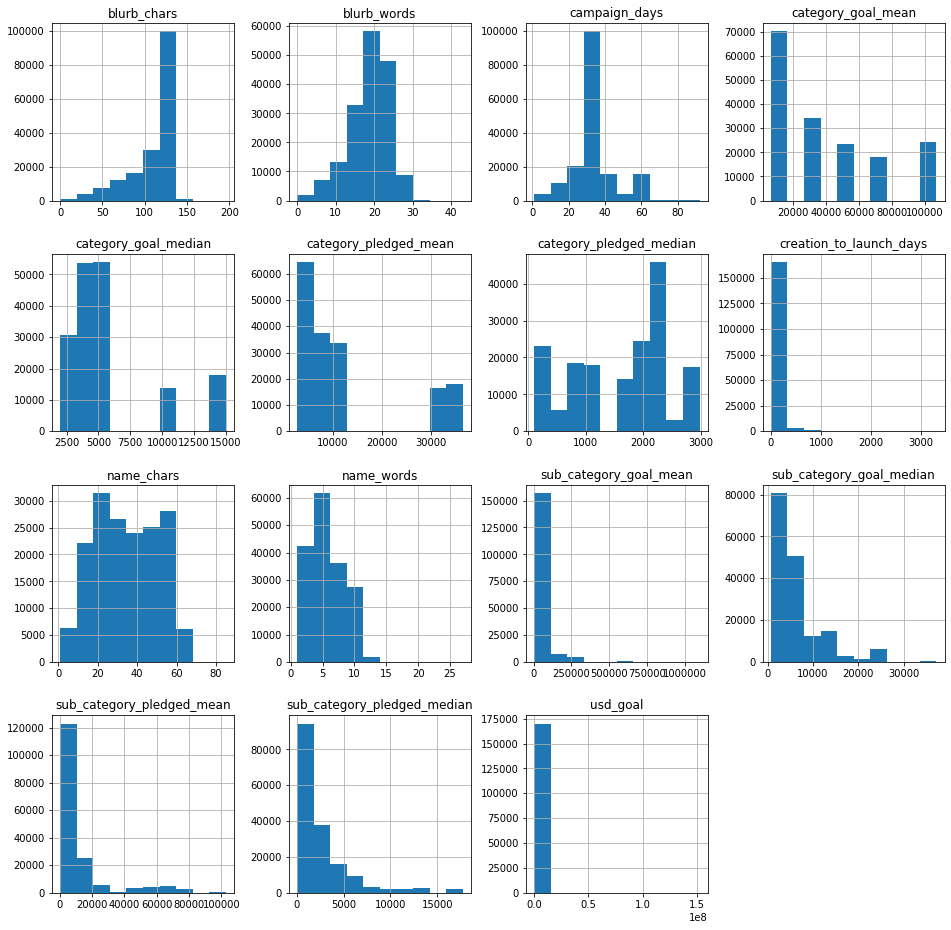

In [27]:
df[cols].hist(figsize=(16, 16));

In [28]:
df_log = df.copy()

In [29]:
import numpy as np

In [30]:
for col in cols:
    df_log[col] = df_log[col].astype('float64').add(1)
    df_log[col] = np.log(df_log[col])

In [31]:
X_raw = df_log.drop(columns = 'state')
y = df_log.state

In [32]:
X_raw.head()

,name_words,name_chars,blurb_words,blurb_chars,usd_goal,creation_to_launch_days,campaign_days,category_goal_mean,category_pledged_mean,sub_category_goal_mean,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
id,,,,,,,,,,,,,,,,,,,,,
808893409,2.079442,3.737670,2.995732,4.875197,8.006701,1.386294,2.197225,9.18541,8.573528,9.084434,...,0,0,1,0,0,0,0,0,0,0
1691985762,1.945910,3.401197,2.890372,4.532599,10.596660,1.791759,4.110874,9.18541,8.573528,9.084434,...,0,0,0,0,0,0,0,0,0,0
1280037487,1.609438,3.465736,2.772589,4.574711,9.210440,1.386294,4.110874,9.18541,8.573528,9.084434,...,0,0,1,0,0,0,0,0,0,0
1469195434,2.302585,3.806662,3.135494,4.709530,8.699681,4.248495,3.091042,9.18541,8.573528,9.084434,...,0,0,0,1,0,0,0,0,0,0
781581087,2.302585,4.094345,2.944439,4.762174,10.126671,4.143135,3.637586,9.18541,8.573528,9.084434,...,0,0,0,0,1,0,0,0,0,0


In [33]:
scaler = StandardScaler()
cols_to_not_scale = [
    'usd_goal', 
    'category_goal_mean',
    'category_pledged_mean',
    'sub_category_goal_mean',
    'sub_category_pledged_mean',
    'category_goal_median',
    'category_pledged_median',
    'sub_category_goal_median',
    'sub_category_pledged_median'
]
cols_to_scale = [col for col in list(X_raw.columns) if col not in cols_to_not_scale]
X = pd.DataFrame(scaler.fit_transform(X_raw.drop(columns = cols_to_not_scale)), columns=cols_to_scale)
X.head()

,name_words,name_chars,blurb_words,blurb_chars,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,0.598653,0.532721,0.169009,0.573659,-0.737985,-3.352950,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,4.034579,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
1,0.303540,-0.101087,-0.143926,-0.430338,-0.481273,1.756809,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,-0.247857,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
2,-0.440084,0.020483,-0.493757,-0.306928,-0.737985,1.756809,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,4.034579,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
3,1.091814,0.662682,0.584121,0.088165,1.074161,-0.966309,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,-0.247857,3.065164,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
4,1.091814,1.204585,0.016661,0.242439,1.007454,0.493053,-0.348843,-0.200889,-0.184498,-0.134794,...,-0.299399,-0.268903,-0.247857,-0.326247,3.169740,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137


In [34]:
scaler = StandardScaler().fit(pd.DataFrame(X_raw.usd_goal))
X_money = pd.DataFrame(scaler.transform(X_raw[cols_to_not_scale]), columns=cols_to_not_scale)

In [35]:
X_money.head()

,usd_goal,category_goal_mean,category_pledged_mean,sub_category_goal_mean,sub_category_pledged_mean,category_goal_median,category_pledged_median,sub_category_goal_median,sub_category_pledged_median
0,-0.223993,0.454487,0.10228,0.396363,0.060054,-0.097796,-0.363036,0.069968,-0.274258
1,1.266819,0.454487,0.10228,0.396363,0.060054,-0.097796,-0.363036,0.069968,-0.274258
2,0.468894,0.454487,0.10228,0.396363,0.060054,-0.097796,-0.363036,0.069968,-0.274258
3,0.174895,0.454487,0.10228,0.396363,0.060054,-0.097796,-0.363036,0.069968,-0.274258
4,0.996288,0.454487,0.10228,0.396363,0.060054,-0.097796,-0.363036,0.069968,-0.274258


In [36]:
X = X.join(X_money)

In [37]:
X.shape

(169962, 237)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/home/fedor/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     21965
           1       0.83      0.79      0.81     29024

    accuracy                           0.79     50989
   macro avg       0.78      0.79      0.78     50989
weighted avg       0.79      0.79      0.79     50989



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(verbose=2)

params = [ 
  {'n_estimators': [200, 400],
   'max_depth': [20, 35],
   'min_samples_split' : [10, 30, 100]
  }
]

gs = GridSearchCV(rf, params, cv=5, n_jobs = 4)

gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

/home/fedor/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished


In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras import optimizers

Using TensorFlow backend.
/home/fedor/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fedor/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fedor/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fedor/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [43]:
def get_layer(i, token, input_dim):
    kwargs = {}
    if i == 0:
        kwargs['input_dim'] = input_dim
    if token[:2] == 'DS':
        return Dense(int(token[3:]), activation='sigmoid', **kwargs)
    if token[:2] == 'DR':
        return Dense(int(token[3:]), activation='relu', **kwargs)
    if token[:2] == 'DL':
        if token[2] == '_':
            return Dense(int(token[3:]), activation=LeakyReLU, **kwargs)
        else:
            return Dense(int(token[3:]), activation=LeakyReLU(0.1*int(token[2])), **kwargs)
    if token[:2] == 'BN':
        return BatchNormalization()
    if token[:2] == 'DO':
        return Dropout(0.2)

In [44]:
def make_NN(loss, optimizer, layers, input_dim):
    model = Sequential()
    for i, token in enumerate(layers.split()):
        model.add(get_layer(i, token, input_dim))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

In [45]:
MODELS = [
    'DS_128 DS_64 BN DO DS_32 DS_8',
    'DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8',
    'DR_256 DR_512 BN DR_512 DR_256 BN DO DR_512 BN DO',
    'DS_256 DS_512 BN DS_512 DS_256 BN DO DS_512 BN DO',
    'DL1256 DL1512 BN DL1512 DL1256 BN DO DL1512 BN DO'
]
OPTIMIZERS = [
    'RMSprop', 'Adam', 'Adadelta', 'Nadam', 'Adamax', 'Adagrad', 'SGD'
]

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [51]:
results = pd.DataFrame([[0.7, 'DS_128 DS_64 BN DO DS_32 DS_8', 'RMSprop'], [0.9, 'kek', 'Winner']], columns = ['accuracy', 'layers', 'optimizer'])

In [58]:
results.sort_values('accuracy', ascending = False)

,accuracy,layers,optimizer
1,0.9,kek,Winner
0,0.7,DS_128 DS_64 BN DO DS_32 DS_8,RMSprop


In [59]:
from sklearn.metrics import accuracy_score

In [61]:
results = []
for layers in MODELS:
  for optimizer in OPTIMIZERS:
    print('network=', layers)
    print('optimizer=', optimizer, '\n')
    model = make_NN('binary_crossentropy', optimizer, layers, input_dim=X_train.shape[1])
    model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))
    y_pred = np.rint(model.predict(X_val)).astype(int)
    print(classification_report(y_val, y_pred))
    results.append([optimizer, layers, accuracy_score(y_val, y_pred)])
    

network= DS_128 DS_64 BN DO DS_32 DS_8
optimizer= RMSprop 

Train on 95178 samples, validate on 23795 samples
Epoch 1/15
95178/95178 [==============================] - 2s 16us/step - loss: 0.4913 - accuracy: 0.7649 - val_loss: 0.4632 - val_accuracy: 0.7677
Epoch 2/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4402 - accuracy: 0.7804 - val_loss: 0.4313 - val_accuracy: 0.7792
Epoch 3/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4253 - accuracy: 0.7846 - val_loss: 0.4267 - val_accuracy: 0.7805
Epoch 4/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4186 - accuracy: 0.7861 - val_loss: 0.4223 - val_accuracy: 0.7825
Epoch 5/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4125 - accuracy: 0.7901 - val_loss: 0.4152 - val_accuracy: 0.7839
Epoch 6/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4082 - accuracy: 0.7942 - val_loss: 0.4125 - val_accuracy: 0.7864
Epoch 7/

Epoch 2/15
95178/95178 [==============================] - 2s 16us/step - loss: 0.4229 - accuracy: 0.7813 - val_loss: 0.4195 - val_accuracy: 0.7800
Epoch 3/15
95178/95178 [==============================] - 1s 15us/step - loss: 0.4114 - accuracy: 0.7871 - val_loss: 0.4157 - val_accuracy: 0.7851
Epoch 4/15
95178/95178 [==============================] - 1s 16us/step - loss: 0.4057 - accuracy: 0.7904 - val_loss: 0.4106 - val_accuracy: 0.7856
Epoch 5/15
95178/95178 [==============================] - 2s 18us/step - loss: 0.4007 - accuracy: 0.7942 - val_loss: 0.4080 - val_accuracy: 0.7885
Epoch 6/15
95178/95178 [==============================] - 1s 16us/step - loss: 0.3958 - accuracy: 0.7972 - val_loss: 0.4108 - val_accuracy: 0.7864
Epoch 7/15
95178/95178 [==============================] - 1s 15us/step - loss: 0.3893 - accuracy: 0.8004 - val_loss: 0.4052 - val_accuracy: 0.7891
Epoch 8/15
95178/95178 [==============================] - 2s 16us/step - loss: 0.3849 - accuracy: 0.8041 - val_loss: 0

Epoch 4/15
95178/95178 [==============================] - 1s 15us/step - loss: 0.6209 - accuracy: 0.6697 - val_loss: 0.5925 - val_accuracy: 0.7225
Epoch 5/15
95178/95178 [==============================] - 1s 15us/step - loss: 0.5654 - accuracy: 0.7363 - val_loss: 0.5371 - val_accuracy: 0.7499
Epoch 6/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.5180 - accuracy: 0.7578 - val_loss: 0.5017 - val_accuracy: 0.7603
Epoch 7/15
95178/95178 [==============================] - 2s 16us/step - loss: 0.4890 - accuracy: 0.7680 - val_loss: 0.4818 - val_accuracy: 0.7668
Epoch 8/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4734 - accuracy: 0.7728 - val_loss: 0.4696 - val_accuracy: 0.7715
Epoch 9/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4635 - accuracy: 0.7747 - val_loss: 0.4618 - val_accuracy: 0.7740
Epoch 10/15
95178/95178 [==============================] - 1s 14us/step - loss: 0.4574 - accuracy: 0.7767 - val_loss: 

95178/95178 [==============================] - 2s 24us/step - loss: 0.4152 - accuracy: 0.7858 - val_loss: 0.4191 - val_accuracy: 0.7836
Epoch 6/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4114 - accuracy: 0.7871 - val_loss: 0.4141 - val_accuracy: 0.7826
Epoch 7/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4084 - accuracy: 0.7905 - val_loss: 0.4175 - val_accuracy: 0.7843
Epoch 8/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4058 - accuracy: 0.7923 - val_loss: 0.4143 - val_accuracy: 0.7845
Epoch 9/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4033 - accuracy: 0.7933 - val_loss: 0.4128 - val_accuracy: 0.7869
Epoch 10/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4003 - accuracy: 0.7971 - val_loss: 0.4140 - val_accuracy: 0.7873
Epoch 11/15
95178/95178 [==============================] - 2s 25us/step - loss: 0.3975 - accuracy: 0.7980 - val_loss: 0.4111 - v

95178/95178 [==============================] - 2s 23us/step - loss: 0.4214 - accuracy: 0.7847 - val_loss: 0.4224 - val_accuracy: 0.7838
Epoch 7/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4178 - accuracy: 0.7875 - val_loss: 0.4201 - val_accuracy: 0.7837
Epoch 8/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4154 - accuracy: 0.7878 - val_loss: 0.4177 - val_accuracy: 0.7855
Epoch 9/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4134 - accuracy: 0.7894 - val_loss: 0.4173 - val_accuracy: 0.7854
Epoch 10/15
95178/95178 [==============================] - 2s 22us/step - loss: 0.4118 - accuracy: 0.7897 - val_loss: 0.4168 - val_accuracy: 0.7859
Epoch 11/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4104 - accuracy: 0.7917 - val_loss: 0.4165 - val_accuracy: 0.7873
Epoch 12/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4084 - accuracy: 0.7911 - val_loss: 0.4144 - 

95178/95178 [==============================] - 7s 74us/step - loss: 0.3784 - accuracy: 0.8074 - val_loss: 0.4129 - val_accuracy: 0.7858
Epoch 8/15
95178/95178 [==============================] - 7s 72us/step - loss: 0.3695 - accuracy: 0.8154 - val_loss: 0.4147 - val_accuracy: 0.7879
Epoch 9/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.3617 - accuracy: 0.8188 - val_loss: 0.4229 - val_accuracy: 0.7854
Epoch 10/15
95178/95178 [==============================] - 7s 72us/step - loss: 0.3519 - accuracy: 0.8263 - val_loss: 0.4348 - val_accuracy: 0.7832
Epoch 11/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.3409 - accuracy: 0.8329 - val_loss: 0.4219 - val_accuracy: 0.7829
Epoch 12/15
95178/95178 [==============================] - 7s 72us/step - loss: 0.3289 - accuracy: 0.8403 - val_loss: 0.4397 - val_accuracy: 0.7795
Epoch 13/15
95178/95178 [==============================] - 7s 72us/step - loss: 0.3151 - accuracy: 0.8496 - val_loss: 0.4579 -

95178/95178 [==============================] - 7s 73us/step - loss: 0.3491 - accuracy: 0.8269 - val_loss: 0.4352 - val_accuracy: 0.7861
Epoch 9/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.3331 - accuracy: 0.8370 - val_loss: 0.4557 - val_accuracy: 0.7797
Epoch 10/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.3176 - accuracy: 0.8458 - val_loss: 0.4559 - val_accuracy: 0.7761
Epoch 11/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.2965 - accuracy: 0.8569 - val_loss: 0.4869 - val_accuracy: 0.7720
Epoch 12/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.2765 - accuracy: 0.8686 - val_loss: 0.4950 - val_accuracy: 0.7681
Epoch 13/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.2561 - accuracy: 0.8805 - val_loss: 0.5310 - val_accuracy: 0.7636
Epoch 14/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.2314 - accuracy: 0.8931 - val_loss: 0.6002 

95178/95178 [==============================] - 6s 67us/step - loss: 0.4042 - accuracy: 0.7940 - val_loss: 0.4110 - val_accuracy: 0.7868
Epoch 10/15
95178/95178 [==============================] - 6s 67us/step - loss: 0.4014 - accuracy: 0.7968 - val_loss: 0.4220 - val_accuracy: 0.7870
Epoch 11/15
95178/95178 [==============================] - 6s 67us/step - loss: 0.4003 - accuracy: 0.7983 - val_loss: 0.4124 - val_accuracy: 0.7884
Epoch 12/15
95178/95178 [==============================] - 6s 66us/step - loss: 0.3980 - accuracy: 0.7988 - val_loss: 0.4188 - val_accuracy: 0.7876
Epoch 13/15
95178/95178 [==============================] - 7s 69us/step - loss: 0.3959 - accuracy: 0.8002 - val_loss: 0.4131 - val_accuracy: 0.7856
Epoch 14/15
95178/95178 [==============================] - 6s 68us/step - loss: 0.3929 - accuracy: 0.8031 - val_loss: 0.4166 - val_accuracy: 0.7882
Epoch 15/15
95178/95178 [==============================] - 7s 69us/step - loss: 0.3910 - accuracy: 0.8030 - val_loss: 0.4173

95178/95178 [==============================] - 8s 79us/step - loss: 0.3901 - accuracy: 0.8004 - val_loss: 0.4297 - val_accuracy: 0.7879
Epoch 11/15
95178/95178 [==============================] - 8s 79us/step - loss: 0.3848 - accuracy: 0.8049 - val_loss: 0.4124 - val_accuracy: 0.7825
Epoch 12/15
95178/95178 [==============================] - 8s 80us/step - loss: 0.3771 - accuracy: 0.8083 - val_loss: 0.4116 - val_accuracy: 0.7887
Epoch 13/15
95178/95178 [==============================] - 7s 79us/step - loss: 0.3711 - accuracy: 0.8128 - val_loss: 0.4150 - val_accuracy: 0.7855
Epoch 14/15
95178/95178 [==============================] - 8s 79us/step - loss: 0.3635 - accuracy: 0.8180 - val_loss: 0.4190 - val_accuracy: 0.7819
Epoch 15/15
95178/95178 [==============================] - 7s 78us/step - loss: 0.3557 - accuracy: 0.8217 - val_loss: 0.4339 - val_accuracy: 0.7856
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     10216
           1   

95178/95178 [==============================] - 6s 65us/step - loss: 0.4290 - accuracy: 0.7809 - val_loss: 0.4300 - val_accuracy: 0.7795
Epoch 12/15
95178/95178 [==============================] - 6s 67us/step - loss: 0.4284 - accuracy: 0.7800 - val_loss: 0.4317 - val_accuracy: 0.7756
Epoch 13/15
95178/95178 [==============================] - 6s 68us/step - loss: 0.4274 - accuracy: 0.7805 - val_loss: 0.4301 - val_accuracy: 0.7773
Epoch 14/15
95178/95178 [==============================] - 6s 65us/step - loss: 0.4280 - accuracy: 0.7811 - val_loss: 0.4277 - val_accuracy: 0.7774
Epoch 15/15
95178/95178 [==============================] - 6s 65us/step - loss: 0.4276 - accuracy: 0.7798 - val_loss: 0.4291 - val_accuracy: 0.7778
              precision    recall  f1-score   support

           0       0.72      0.80      0.75     10216
           1       0.83      0.76      0.80     13579

    accuracy                           0.78     23795
   macro avg       0.78      0.78      0.78     23795


/home/fedor/.local/lib/python3.6/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 95178 samples, validate on 23795 samples
Epoch 1/15
95178/95178 [==============================] - 7s 79us/step - loss: 0.4741 - accuracy: 0.7588 - val_loss: 0.4302 - val_accuracy: 0.7710
Epoch 2/15
95178/95178 [==============================] - 6s 66us/step - loss: 0.4235 - accuracy: 0.7801 - val_loss: 0.4201 - val_accuracy: 0.7833
Epoch 3/15
95178/95178 [==============================] - 6s 68us/step - loss: 0.4137 - accuracy: 0.7873 - val_loss: 0.4201 - val_accuracy: 0.7750
Epoch 4/15
95178/95178 [==============================] - 7s 69us/step - loss: 0.4050 - accuracy: 0.7939 - val_loss: 0.4114 - val_accuracy: 0.7875
Epoch 5/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.3994 - accuracy: 0.7964 - val_loss: 0.4268 - val_accuracy: 0.7881
Epoch 6/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.3939 - accuracy: 0.8025 - val_loss: 0.4095 - val_accuracy: 0.7892
Epoch 7/15
95178/95178 [==============================] - 7s 69us/st

Epoch 2/15
95178/95178 [==============================] - 7s 78us/step - loss: 0.4171 - accuracy: 0.7834 - val_loss: 0.4246 - val_accuracy: 0.7789
Epoch 3/15
95178/95178 [==============================] - 8s 83us/step - loss: 0.4068 - accuracy: 0.7892 - val_loss: 0.4126 - val_accuracy: 0.7797
Epoch 4/15
95178/95178 [==============================] - 8s 82us/step - loss: 0.4006 - accuracy: 0.7953 - val_loss: 0.4097 - val_accuracy: 0.7884
Epoch 5/15
95178/95178 [==============================] - 8s 82us/step - loss: 0.3934 - accuracy: 0.7985 - val_loss: 0.4042 - val_accuracy: 0.7895
Epoch 6/15
95178/95178 [==============================] - 8s 86us/step - loss: 0.3885 - accuracy: 0.8026 - val_loss: 0.4064 - val_accuracy: 0.7907
Epoch 7/15
95178/95178 [==============================] - 8s 87us/step - loss: 0.3826 - accuracy: 0.8063 - val_loss: 0.4072 - val_accuracy: 0.7865
Epoch 8/15
95178/95178 [==============================] - 8s 85us/step - loss: 0.3779 - accuracy: 0.8102 - val_loss: 0

95178/95178 [==============================] - 7s 69us/step - loss: 0.4333 - accuracy: 0.7789 - val_loss: 0.4316 - val_accuracy: 0.7753
Epoch 4/15
95178/95178 [==============================] - 7s 76us/step - loss: 0.4220 - accuracy: 0.7839 - val_loss: 0.4281 - val_accuracy: 0.7788
Epoch 5/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.4143 - accuracy: 0.7890 - val_loss: 0.4260 - val_accuracy: 0.7791
Epoch 6/15
95178/95178 [==============================] - 7s 73us/step - loss: 0.4070 - accuracy: 0.7937 - val_loss: 0.4235 - val_accuracy: 0.7811
Epoch 7/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.4040 - accuracy: 0.7946 - val_loss: 0.4239 - val_accuracy: 0.7792
Epoch 8/15
95178/95178 [==============================] - 7s 70us/step - loss: 0.3977 - accuracy: 0.7989 - val_loss: 0.4208 - val_accuracy: 0.7813
Epoch 9/15
95178/95178 [==============================] - 7s 71us/step - loss: 0.3923 - accuracy: 0.8037 - val_loss: 0.4215 - val

In [62]:
res_df = pd.DataFrame(results, columns = ['optimizer', 'layers', 'accuracy'])

In [63]:
res_df = res_df.sort_values('accuracy', ascending = False)

In [64]:
res_df

,optimizer,layers,accuracy
11,Adamax,DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8,0.790628
9,Adadelta,DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8,0.790502
26,Adagrad,DS_256 DS_512 BN DS_512 DS_256 BN DO DS_512 BN DO,0.789578
0,RMSprop,DS_128 DS_64 BN DO DS_32 DS_8,0.789073
4,Adamax,DS_128 DS_64 BN DO DS_32 DS_8,0.788947
21,RMSprop,DS_256 DS_512 BN DS_512 DS_256 BN DO DS_512 BN DO,0.787981
7,RMSprop,DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8,0.787602
23,Adadelta,DS_256 DS_512 BN DS_512 DS_256 BN DO DS_512 BN DO,0.787602
2,Adadelta,DS_128 DS_64 BN DO DS_32 DS_8,0.787350
8,Adam,DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8,0.786132


In [65]:
MODELS = [
    'DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8',
    'DS_512 DS_256 BN DO DS_128 DS_64 BN DO DS_32 DS_16',
    'DS_256 DS_128 BN DO DS_128 DS_64 BN DO DS_32 DS_16',
]
OPTIMIZERS = [
    'Adamax'
]

In [69]:
results = []
for layers in MODELS:
  for optimizer in OPTIMIZERS:
    print('network=', layers)
    print('optimizer=', optimizer, '\n')
    model = make_NN('binary_crossentropy', optimizer, layers, input_dim=X_train.shape[1])
    model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_val, y_val))
    y_pred = np.rint(model.predict(X_val)).astype(int)
    print(classification_report(y_val, y_pred))
    results.append([optimizer, layers, accuracy_score(y_val, y_pred)])
    

network= DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8
optimizer= Adamax 

Train on 95178 samples, validate on 23795 samples
Epoch 1/30
95178/95178 [==============================] - 4s 38us/step - loss: 0.5322 - accuracy: 0.7621 - val_loss: 0.4984 - val_accuracy: 0.7708
Epoch 2/30
95178/95178 [==============================] - 2s 22us/step - loss: 0.4634 - accuracy: 0.7789 - val_loss: 0.4542 - val_accuracy: 0.7783
Epoch 3/30
95178/95178 [==============================] - 2s 22us/step - loss: 0.4454 - accuracy: 0.7810 - val_loss: 0.4409 - val_accuracy: 0.7808
Epoch 4/30
95178/95178 [==============================] - 2s 22us/step - loss: 0.4343 - accuracy: 0.7831 - val_loss: 0.4319 - val_accuracy: 0.7803
Epoch 5/30
95178/95178 [==============================] - 2s 21us/step - loss: 0.4263 - accuracy: 0.7838 - val_loss: 0.4256 - val_accuracy: 0.7827
Epoch 6/30
95178/95178 [==============================] - 2s 22us/step - loss: 0.4184 - accuracy: 0.7877 - val_loss: 0.4199 - val_accurac

95178/95178 [==============================] - 3s 30us/step - loss: 0.3534 - accuracy: 0.8261 - val_loss: 0.4193 - val_accuracy: 0.7855
Epoch 23/30
95178/95178 [==============================] - 3s 29us/step - loss: 0.3492 - accuracy: 0.8301 - val_loss: 0.4219 - val_accuracy: 0.7854
Epoch 24/30
95178/95178 [==============================] - 3s 29us/step - loss: 0.3468 - accuracy: 0.8323 - val_loss: 0.4242 - val_accuracy: 0.7828
Epoch 25/30
95178/95178 [==============================] - 3s 29us/step - loss: 0.3427 - accuracy: 0.8347 - val_loss: 0.4215 - val_accuracy: 0.7843
Epoch 26/30
95178/95178 [==============================] - 3s 29us/step - loss: 0.3384 - accuracy: 0.8361 - val_loss: 0.4365 - val_accuracy: 0.7826
Epoch 27/30
95178/95178 [==============================] - 3s 29us/step - loss: 0.3357 - accuracy: 0.8374 - val_loss: 0.4354 - val_accuracy: 0.7821
Epoch 28/30
95178/95178 [==============================] - 3s 29us/step - loss: 0.3324 - accuracy: 0.8401 - val_loss: 0.4427

In [70]:
res_df = pd.DataFrame(results, columns = ['optimizer', 'layers', 'accuracy'])
res_df = res_df.sort_values('accuracy', ascending = False)

In [71]:
res_df

,optimizer,layers,accuracy
0,Adamax,DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8,0.786384
2,Adamax,DS_256 DS_128 BN DO DS_128 DS_64 BN DO DS_32 D...,0.786258
1,Adamax,DS_512 DS_256 BN DO DS_128 DS_64 BN DO DS_32 D...,0.781215


In [75]:
results = []
for lr in [0.001, 0.003]:
  for decay in [0.0, 0.01]:
    print('lr=', lr)
    print('decay=', decay, '\n')
    model = make_NN('binary_crossentropy', keras.optimizers.Adamax(lr=lr, decay=decay), 'DS_256 DS_128 BN DO DS_64 DS_32 BN DO DS_16 DS_8', input_dim=X_train.shape[1])
    model.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_val, y_val))
    y_pred = np.rint(model.predict(X_val)).astype(int)
    print(classification_report(y_val, y_pred))
    results.append([lr, decay, accuracy_score(y_val, y_pred)])

lr= 0.001
decay= 0.0 

Train on 95178 samples, validate on 23795 samples
Epoch 1/15
95178/95178 [==============================] - 4s 41us/step - loss: 0.5218 - accuracy: 0.7517 - val_loss: 0.5032 - val_accuracy: 0.7599
Epoch 2/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4627 - accuracy: 0.7783 - val_loss: 0.4605 - val_accuracy: 0.7752
Epoch 3/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4468 - accuracy: 0.7797 - val_loss: 0.4501 - val_accuracy: 0.7783
Epoch 4/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4375 - accuracy: 0.7819 - val_loss: 0.4408 - val_accuracy: 0.7779
Epoch 5/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4315 - accuracy: 0.7838 - val_loss: 0.4309 - val_accuracy: 0.7822
Epoch 6/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4253 - accuracy: 0.7840 - val_loss: 0.4254 - val_accuracy: 0.7823
Epoch 7/15
95178/95178 [=====================

Epoch 3/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4497 - accuracy: 0.7814 - val_loss: 0.4496 - val_accuracy: 0.7785
Epoch 4/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4464 - accuracy: 0.7817 - val_loss: 0.4462 - val_accuracy: 0.7806
Epoch 5/15
95178/95178 [==============================] - 2s 24us/step - loss: 0.4435 - accuracy: 0.7832 - val_loss: 0.4446 - val_accuracy: 0.7802
Epoch 6/15
95178/95178 [==============================] - 2s 23us/step - loss: 0.4425 - accuracy: 0.7827 - val_loss: 0.4432 - val_accuracy: 0.7796
Epoch 7/15
95178/95178 [==============================] - 2s 22us/step - loss: 0.4408 - accuracy: 0.7836 - val_loss: 0.4420 - val_accuracy: 0.7799
Epoch 8/15
95178/95178 [==============================] - 2s 22us/step - loss: 0.4398 - accuracy: 0.7834 - val_loss: 0.4416 - val_accuracy: 0.7788
Epoch 9/15
95178/95178 [==============================] - 2s 22us/step - loss: 0.4384 - accuracy: 0.7846 - val_loss: 0

In [76]:
res_df = pd.DataFrame(results, columns = ['learning_rate', 'decay', 'accuracy'])
res_df = res_df.sort_values('accuracy', ascending = False)

In [77]:
res_df

,learning_rate,decay,accuracy
2,0.003,0.00,0.788821
0,0.001,0.00,0.786594
3,0.003,0.01,0.779996
1,0.001,0.01,0.777558
